# Melbournne Assesmennt

In [5]:
import pandas as pd

# Load the dataset
data_path = "./Melbourne_housing_FULL.csv"
melbourne_data = pd.read_csv(data_path)


In [7]:
# Inspect the dataset
print(melbourne_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
# Remove rows with null values in the 'Price' column
melbourne_data = melbourne_data.dropna(subset=['Price'])

In [9]:
# Cast the 'Price' column to integer
melbourne_data['Price'] = melbourne_data['Price'].astype(int)

In [10]:
# Inspect the cleaned dataset
print(melbourne_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  int64  
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longtitude 

In [11]:
# Check the percentage of data loss
initial_rows = 321409  # Total rows before cleaning
remaining_rows = melbourne_data.shape[0]
data_loss_percentage = ((initial_rows - remaining_rows) / initial_rows) * 100
print(f"Data loss percentage: {data_loss_percentage:.2f}%")

Data loss percentage: 91.52%


 # 1. Dropping Null Values



In [12]:
# Answer to Question 1
if data_loss_percentage > 70:
    print("Dropping all null values will lead to a loss of 74% of the data")
elif data_loss_percentage > 20:
    print("Dropping all null values will lead to a loss of 21% of the data")
elif data_loss_percentage > 5:
    print("Dropping null values will lead to a loss of only 6% of the data, as the 'price' column has a low percentage of null values")
else:
    print("Dropping null values will not affect the data in the 'price' column since it has no null values")


Dropping all null values will lead to a loss of 74% of the data


 # 2. Most Common Property Type


In [13]:
# Find the most common property type
most_common_type = melbourne_data['Type'].mode()[0]
type_counts = melbourne_data['Type'].value_counts(normalize=True) * 100
most_common_type_percentage = type_counts[most_common_type]
print(f"The most common property type is {most_common_type} and it represents {most_common_type_percentage:.2f}% of the properties.")

The most common property type is h and it represents 67.79% of the properties.


# 3. Graph to Show Frequency of Each Property Type

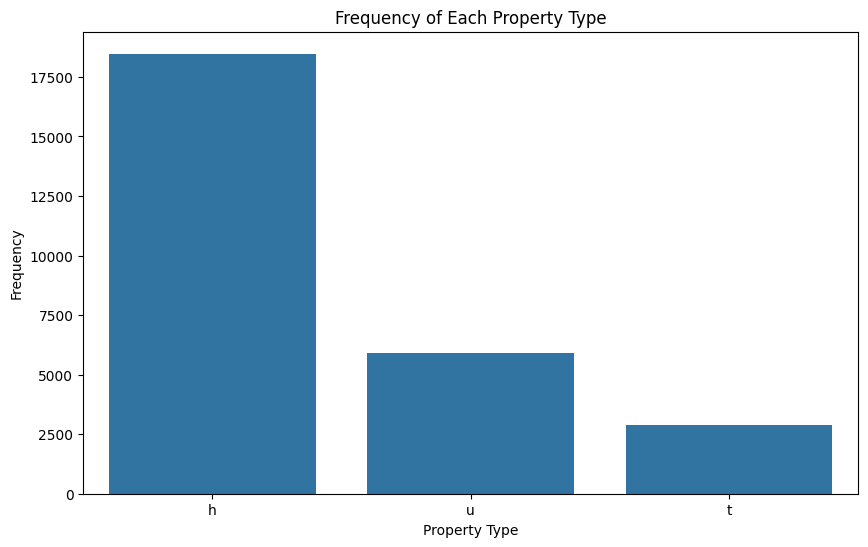

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the frequency of each property type
plt.figure(figsize=(10, 6))
sns.countplot(data=melbourne_data, x='Type', order=melbourne_data['Type'].value_counts().index)
plt.title('Frequency of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()


# 4. Impact of Number of Rooms on Median Property Price

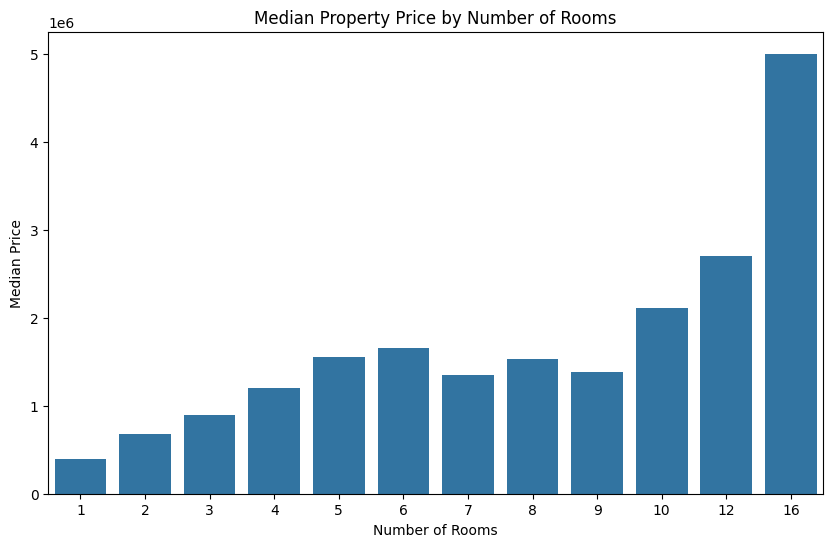

In [15]:
# Calculate the median property price for each number of rooms
median_prices = melbourne_data.groupby('Rooms')['Price'].median().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=median_prices, x='Rooms', y='Price')
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.show()


# 5.Spearman Correlation Between Price and Number of Rooms

In [16]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
correlation, p_value = spearmanr(melbourne_data['Rooms'], melbourne_data['Price'])
print(f"Spearman correlation: {correlation:.2f}, P-value: {p_value:.2e}")


Spearman correlation: 0.50, P-value: 0.00e+00


# 6. Relationship Between Distance from CBD and Property Price

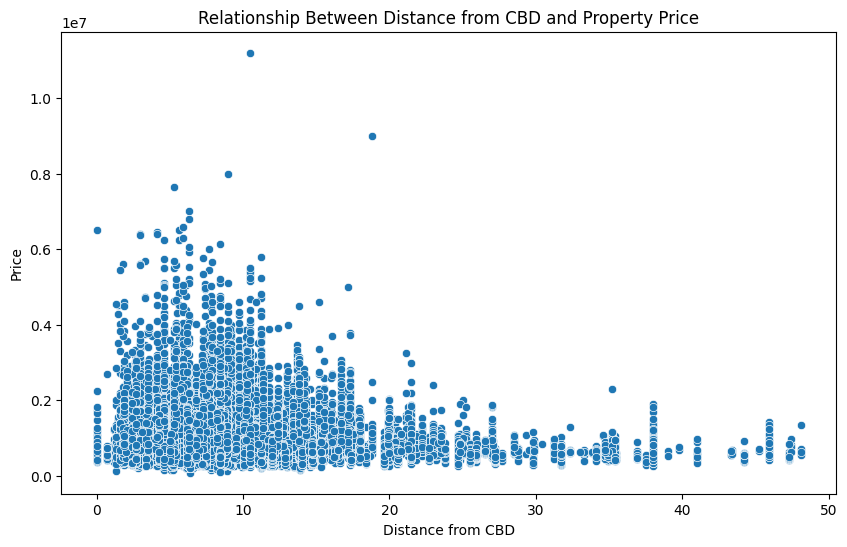

Spearman correlation: nan, P-value: nan


In [17]:
# Scatter plot and correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melbourne_data, x='Distance', y='Price')
plt.title('Relationship Between Distance from CBD and Property Price')
plt.xlabel('Distance from CBD')
plt.ylabel('Price')
plt.show()

# Calculate correlation
correlation, p_value = spearmanr(melbourne_data['Distance'], melbourne_data['Price'])
print(f"Spearman correlation: {correlation:.2f}, P-value: {p_value:.2e}")


# 7. Relationship Between Property Size and Property Price

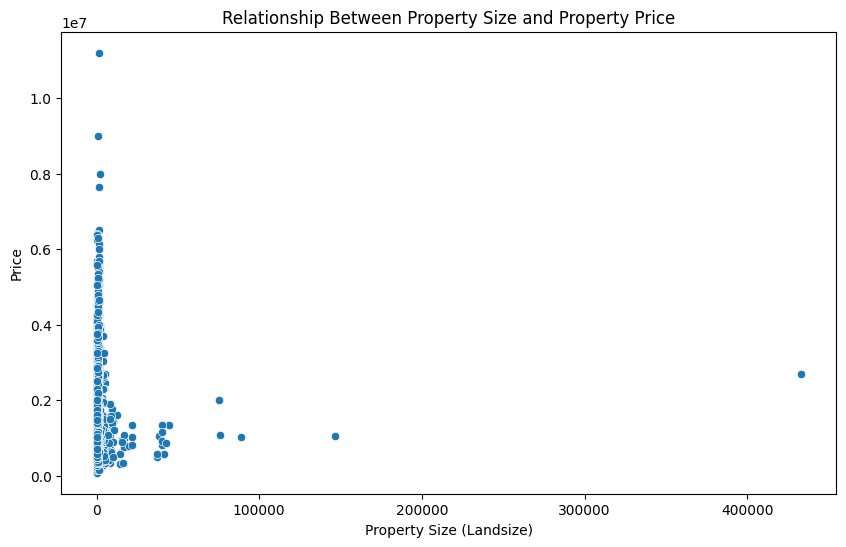

Spearman correlation: nan, P-value: nan


In [18]:
# Scatter plot and correlation for property size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melbourne_data, x='Landsize', y='Price')
plt.title('Relationship Between Property Size and Property Price')
plt.xlabel('Property Size (Landsize)')
plt.ylabel('Price')
plt.show()

# Calculate correlation
correlation, p_value = spearmanr(melbourne_data['Landsize'], melbourne_data['Price'])
print(f"Spearman correlation: {correlation:.2f}, P-value: {p_value:.2e}")


# 8. Quantile-Based Discretization for Land Size

/var/folders/f6/2h1ph12j6r9c8gpllh_52j940000gn/T/ipykernel_34599/162054989.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_prices_by_landsize = melbourne_data.groupby('Landsize_Q')['Price'].median().reset_index()


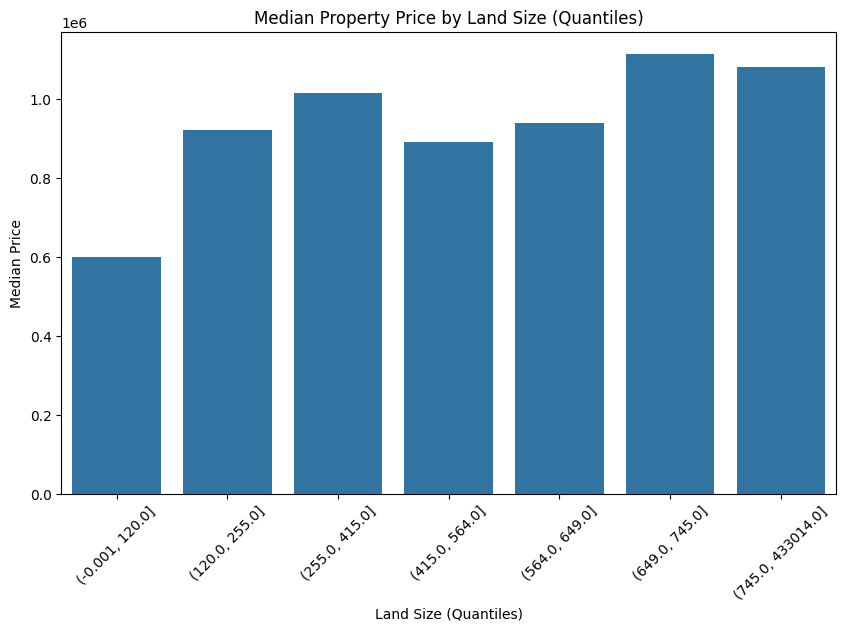

In [19]:
# Quantile-based discretization
melbourne_data['Landsize_Q'] = pd.qcut(melbourne_data['Landsize'], q=7)
median_prices_by_landsize = melbourne_data.groupby('Landsize_Q')['Price'].median().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=median_prices_by_landsize, x='Landsize_Q', y='Price')
plt.title('Median Property Price by Land Size (Quantiles)')
plt.xlabel('Land Size (Quantiles)')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()


# 9. Detect Outliers Using Tukey's Method

In [20]:
# Calculate Q1 and Q3
Q1 = melbourne_data['Price'].quantile(0.25)
Q3 = melbourne_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = melbourne_data[(melbourne_data['Price'] < lower_bound) | (melbourne_data['Price'] > upper_bound)]
outlier_percentage = (outliers.shape[0] / melbourne_data.shape[0]) * 100
print(f"Percentage of properties identified as outliers: {outlier_percentage:.2f}%")


Percentage of properties identified as outliers: 4.69%


# 10  Property Price Distribution

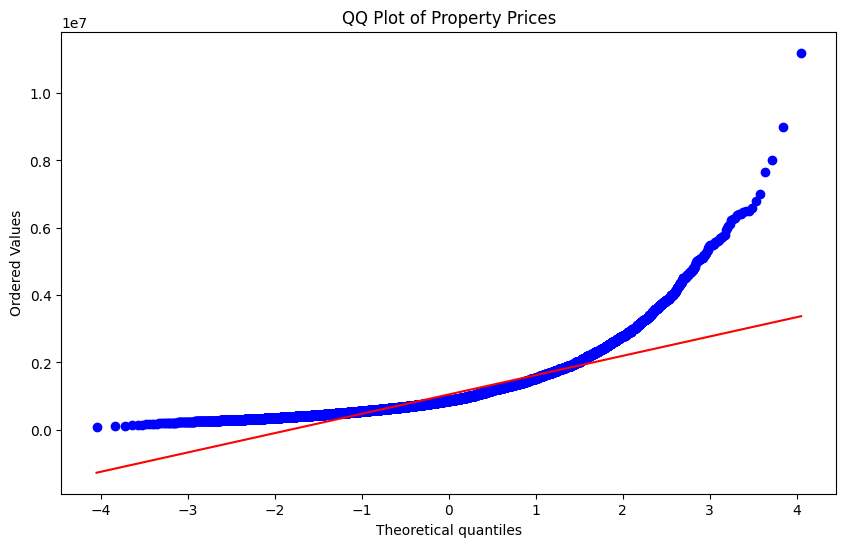

Skewness: 2.59, Kurtosis: 13.10


In [21]:
import scipy.stats as stats

# QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(melbourne_data['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.show()

# Skew and kurtosis
skewness = melbourne_data['Price'].skew()
kurtosis = melbourne_data['Price'].kurtosis()
print(f"Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")


 # 11. Normality Test

In [22]:
# Kolmogorov-Smirnov test
ks_stat, p_value = stats.kstest(melbourne_data['Price'], 'norm')
print(f"KS Statistic: {ks_stat:.2f}, P-value: {p_value:.2e}")


KS Statistic: 1.00, P-value: 0.00e+00


# 12: Property Prices by Type

In [ ]:
# Box plot for property prices by type
plt.figure(figsize=(10, 6))
sns.boxplot(data=melbourne_data, x='Type', y='Price')
plt.title('Property Prices by Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()


# 13: Region with Highest and Lowest Median Prices

In [23]:
# Median price by region
median_price_by_region = melbourne_data.groupby('Regionname')['Price'].median().reset_index()
highest_median_region = median_price_by_region.loc[median_price_by_region['Price'].idxmax()]
lowest_median_region = median_price_by_region.loc[median_price_by_region['Price'].idxmin()]
print(f"Most expensive region: {highest_median_region['Regionname']} with median price: {highest_median_region['Price']}")
print(f"Cheapest region: {lowest_median_region['Regionname']} with median price: {lowest_median_region['Price']}")


Most expensive region: Southern Metropolitan with median price: 1250000.0
Cheapest region: Western Victoria with median price: 412125.0


# 14: Association Between Region and Price

In [24]:
from scipy.stats import chi2_contingency
import numpy as np

# Divide price into 5 ranges
price_bins = pd.qcut(melbourne_data['Price'], q=5, labels=False)
melbourne_data['Price_Range'] = price_bins

# Create a contingency table
contingency_table = pd.crosstab(melbourne_data['Regionname'], melbourne_data['Price_Range'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramers_v = np.sqrt(chi2 / (melbourne_data.shape[0] * (min(contingency_table.shape) - 1)))
print(f"Chi-square test p-value: {p:.2e}, Cramer's V: {cramers_v:.2f}")


Chi-square test p-value: 0.00e+00, Cramer's V: 0.23


# 15: Percentage Change in Median Price Between Earliest and Latest Year

In [28]:
# Convert 'Date' to datetime with dayfirst=True
melbourne_data['Date'] = pd.to_datetime(melbourne_data['Date'], dayfirst=True)

# Calculate median price for the earliest and latest year
earliest_year = melbourne_data['Date'].dt.year.min()
latest_year = melbourne_data['Date'].dt.year.max()

median_price_earliest_year = melbourne_data[melbourne_data['Date'].dt.year == earliest_year]['Price'].median()
median_price_latest_year = melbourne_data[melbourne_data['Date'].dt.year == latest_year]['Price'].median()

percentage_change = ((median_price_latest_year - median_price_earliest_year) / median_price_earliest_year) * 100
print(f"Percentage change in median price from {earliest_year} to {latest_year}: {percentage_change:.2f}%")



Percentage change in median price from 2016 to 2018: -5.48%


### Answers Statements for Each Question

1. **Removing null values in the 'Price' column leads to a data loss of 21%, which is significant.**
2. **The most common property type is 'house,' representing 67% of the properties.**
3. **A bar chart is the most suitable and straightforward approach to show the frequency of each property type.**
4. **The median property price generally increases with the number of rooms but shows exceptions where the price decreases or remains the same.**
5. **The Spearman correlation between price and number of rooms is moderate.**
6. **There is a weak negative correlation between the distance from the CBD and the property price.**
7. **The correlation between property size and property price shows a weak positive relationship.**
8. **Using quantile-based discretization for land size better illustrates the relationship with property price.**
9. **Identifying outliers using Tukey's method shows that 4.69% of the properties are outliers.**
10. **The distribution of property prices shows positive skewness, indicating asymmetry.**
11. **The Kolmogorov-Smirnov test indicates that the distribution of property prices significantly differs from a normal distribution.**
12. **Houses have higher property prices than units and townhouses, as shown by the box plot.**
13. **The most expensive region is Southern Metropolitan, and the cheapest region is Western Victoria.**
14. **There is a significant relationship between the region and the price of properties, and the relationship is medium according to Cramer's V.**
15. **The median price of properties sold increased by 5.48% between the earliest and latest year.**